In [1]:
from netCDF4 import Dataset
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.lines import Line2D
%matplotlib inline
import MITgcmutils as mit
import numpy as np
from scipy import signal
import seaborn as sns
import sys
sys.path.append('/Users/Karina/Research/SWOT-Scripps/notebooks_SVB/')
import svb_tools as svb
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Functions
def plot_ssh(nt, vmin=-0.3, vmax=0.3):
    eta = mit.mnc.mnc_files(outdir+'eta.0000000000.t*.nc', layout='exch2')
    W1 = eta.variables['ETAN'][nt,:,:]
    W2 = eta.variables['ETAN'][nt+2,:,:]
    W3 = eta.variables['ETAN'][nt+4,:,:]
    W4 = eta.variables['ETAN'][nt+6,:,:]
    W5 = eta.variables['ETAN'][nt+8,:,:]
    W6 = eta.variables['ETAN'][nt+10,:,:]
    eta.close()

    fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(15,11), sharey=True, sharex=True)
    ax0.set_facecolor('tan')
    ax1.set_facecolor('tan')
    ax2.set_facecolor('tan')
    ax3.set_facecolor('tan')
    ax4.set_facecolor('tan')
    ax5.set_facecolor('tan')

    pc = ax0.pcolormesh(lon,lat, np.ma.masked_array(np.squeeze(W1*100),mask=mask[0,:,:]),
                       cmap=cmo.cm.delta, vmin=vmin, vmax=vmax)
    ax0.contour(lon,lat, np.ma.masked_array(np.squeeze(W1*100),mask=mask[0,:,:]),levels=[0], colors='0.5')
    ax0.contour(lon,lat,depth, levels=[0,250], colors='k')

    pc = ax1.pcolormesh(lon,lat, np.ma.masked_array(np.squeeze(W2*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=vmin, vmax=vmax)
    ax1.contour(lon,lat, np.ma.masked_array(np.squeeze(W2*100),mask=mask[0,:,:]),levels=[0], colors='0.5')
    ax1.contour(lon,lat,depth, levels=[0,250], colors='k')

    pc = ax2.pcolormesh(lon,lat, np.ma.masked_array(np.squeeze(W3*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=vmin, vmax=vmax)
    ax2.contour(lon,lat, np.ma.masked_array(np.squeeze(W3*100),mask=mask[0,:,:]),levels=[0], colors='0.5')
    ax2.contour(lon,lat,depth, levels=[0,250], colors='k')

    pc = ax3.pcolormesh(lon,lat, np.ma.masked_array(np.squeeze(W4*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=vmin, vmax=vmax)
    ax3.contour(lon,lat, np.ma.masked_array(np.squeeze(W4*100),mask=mask[0,:,:]),levels=[0], colors='0.5')
    ax3.contour(lon,lat,depth, levels=[0,250], colors='k')

    pc = ax4.pcolormesh(lon,lat, np.ma.masked_array(np.squeeze(W5*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=vmin, vmax=vmax)
    ax4.contour(lon,lat, np.ma.masked_array(np.squeeze(W5*100),mask=mask[0,:,:]),levels=[0], colors='0.5')
    ax4.contour(lon,lat,depth, levels=[0,250], colors='k')

    pc = ax5.pcolormesh(lon,lat, np.ma.masked_array(np.squeeze(W6*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=vmin, vmax=vmax)
    ax5.contour(lon,lat, np.ma.masked_array(np.squeeze(W6*100),mask=mask[0,:,:]),levels=[0], colors='0.5')
    ax5.contour(lon,lat,depth, levels=[0,250], colors='k')

    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
    cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.delta),
                      cax=cbar_ax, orientation='vertical',label='cm')
    
    for ax in [ax0,ax1,ax2,ax3,ax4,ax5]:
        # ssh transects
        for ii in range(len(lon_inds)):
            ax.plot(lon[lon_inds[ii]],lat[lat_inds[ii]],'ro', markersize=4)

    ax3.set_xlabel('x-ind')
    ax4.set_xlabel('x-ind')
    ax5.set_xlabel('x-ind')
    ax0.set_ylabel('y-ind')
    ax3.set_ylabel('y-ind')

    ax0.set_title(r'$\eta$ at %1.2f h'%(time[nt]/3600))
    ax1.set_title(r'$\eta$ at %1.2f h'%(time[nt+2]/3600))
    ax2.set_title(r'$\eta$ at %1.2f h'%(time[nt+4]/3600))
    ax3.set_title(r'$\eta$ at %1.2f h'%(time[nt+6]/3600))
    ax4.set_title(r'$\eta$ at %1.2f h'%(time[nt+8]/3600))
    ax5.set_title(r'$\eta$ at %1.2f h'%(time[nt+10]/3600))
   
    for ax in [ax0,ax1,ax2,ax3,ax4,ax5]:
        ax.set_aspect(1)
    return(fig,ax0,ax1,ax2,ax3,ax4,ax5)

# ---------------------------------------------------------------------------
def plot_ssh_filt(nt, ssh_filt):
    fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(15,11), sharey=True, sharex=True)
    ax0.set_facecolor('tan')
    ax1.set_facecolor('tan')
    ax2.set_facecolor('tan')
    ax3.set_facecolor('tan')
    ax4.set_facecolor('tan')
    ax5.set_facecolor('tan')

    pc = ax0.pcolormesh(lon,lat, np.ma.masked_array(np.squeeze(ssh_filt[nt,:,:,:]*100),mask=mask[0,:,:]),
                       cmap=cmo.cm.delta, vmin=-0.2, vmax=0.2)
    ax0.contour(lon,lat, np.ma.masked_array(np.squeeze(ssh_filt[nt,:,:,:]*100),mask=mask[0,:,:]),
                levels=[0], colors='0.5')
    ax0.contour(lon,lat,depth, levels=[0,250], colors='k')

    pc = ax1.pcolormesh(lon,lat, np.ma.masked_array(np.squeeze(ssh_filt[nt+1,:,:,:]*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=-0.2, vmax=0.2)
    ax1.contour(lon,lat, np.ma.masked_array(np.squeeze(ssh_filt[nt+1,:,:,:]*100),mask=mask[0,:,:]),
                levels=[0], colors='0.5')
    ax1.contour(lon,lat,depth, levels=[0,250], colors='k')

    pc = ax2.pcolormesh(lon,lat, np.ma.masked_array(np.squeeze(ssh_filt[nt+2,:,:,:]*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=-0.2, vmax=0.2)
    ax2.contour(lon,lat, np.ma.masked_array(np.squeeze(ssh_filt[nt+2,:,:,:]*100),mask=mask[0,:,:]),
                levels=[0], colors='0.5')
    ax2.contour(lon,lat,depth, levels=[0,250], colors='k')

    pc = ax3.pcolormesh(lon,lat, np.ma.masked_array(np.squeeze(ssh_filt[nt+3,:,:,:]*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=-0.2, vmax=0.2)
    ax3.contour(lon,lat, np.ma.masked_array(np.squeeze(ssh_filt[nt+3,:,:,:]*100),mask=mask[0,:,:]),
                levels=[0], colors='0.5')
    ax3.contour(lon,lat,depth, levels=[0,250], colors='k')

    pc = ax4.pcolormesh(lon,lat, np.ma.masked_array(np.squeeze(ssh_filt[nt+4,:,:,:]*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=-0.2, vmax=0.2)
    ax4.contour(lon,lat, np.ma.masked_array(np.squeeze(ssh_filt[nt+4,:,:,:]*100),mask=mask[0,:,:]),
                levels=[0], colors='0.5')
    ax4.contour(lon,lat,depth, levels=[0,250], colors='k')

    pc = ax5.pcolormesh(lon,lat, np.ma.masked_array(np.squeeze(ssh_filt[nt+5,:,:,:]*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=-0.2, vmax=0.2)
    ax5.contour(lon,lat, np.ma.masked_array(np.squeeze(ssh_filt[nt+5,:,:,:]*100),mask=mask[0,:,:]),
                levels=[0], colors='0.5')
    ax5.contour(lon,lat,depth, levels=[0,250], colors='k')

    norm = mpl.colors.Normalize(vmin=-0.2, vmax=0.2)
    cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
    cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.delta),
                      cax=cbar_ax, orientation='vertical',label='cm')
    
    for ax in [ax0,ax1,ax2,ax3,ax4,ax5]:
        # ssh transects
        for ii in range(len(lon_inds)):
            ax.plot(lon[lon_inds[ii]],lat[lat_inds[ii]],'ro', markersize=4)

    ax3.set_xlabel('x-ind')
    ax4.set_xlabel('x-ind')
    ax5.set_xlabel('x-ind')
    ax0.set_ylabel('y-ind')
    ax3.set_ylabel('y-ind')

    ax0.set_title(r'Filtered $\eta$ at %1.2f h'%(time[nt]/3600))
    ax1.set_title(r'%1.2f h'%(time[nt+1]/3600))
    ax2.set_title(r'%1.2f h'%(time[nt+2]/3600))
    ax3.set_title(r'%1.2f h'%(time[nt+3]/3600))
    ax4.set_title(r'%1.2f h'%(time[nt+4]/3600))
    ax5.set_title(r'%1.2f h'%(time[nt+5]/3600))
   
    for ax in [ax0,ax1,ax2,ax3,ax4,ax5]:
        ax.set_aspect(1)
    return(fig,ax0,ax1,ax2,ax3,ax4,ax5)

In [3]:
outdir = '/Users/Karina/Tools/MITgcm/SVB/05_448x512x100/02_spinup_feb/mnc_test_0001/'

In [4]:
bat = mit.mnc.mnc_files(outdir+'grid.t*.nc', layout='exch2')
depth = bat.variables['Depth'][:]
lat = bat.variables['Y'][:]
lon = bat.variables['X'][:]
LAT = bat.variables['YC'][:]
LON = bat.variables['XC'][:]
Z = bat.variables['Z'][:]
Zl = bat.variables['Zl'][:]
# centers mask
hFacC = bat.variables['HFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)
bat.close()

dyn = mit.mnc.mnc_files(outdir+'dynVars.0000000000.t*.nc', layout='exch2')
Zind = (dyn.variables['diag_levels'][:]).astype(int)
time = dyn.variables['T'][:]
dyn.close()

### Domain and virtual stations

* Virtual stations try to follow 20 m isobath (20 to 30 m) - dark grey contour.
* Light grey contour: 250 m (shelf break)
* Black contour: 0 m

Depth at station: 17.2 m 
Depth at station: 23.0 m 
Depth at station: 26.2 m 
Depth at station: 23.0 m 
Depth at station: 23.0 m 
Depth at station: 20.0 m 
Depth at station: 23.0 m 
Depth at station: 33.5 m 
Depth at station: 17.2 m 
Depth at station: 33.5 m 
Depth at station: 23.0 m 
Depth at station: 26.2 m 


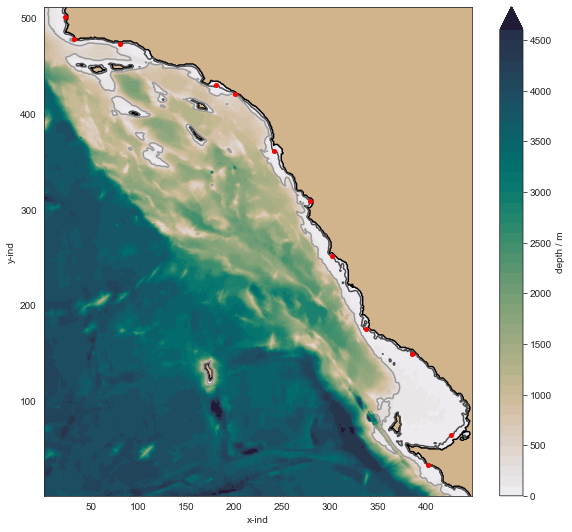

In [5]:
sns.set_style('white')
fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')
pc = ax.contourf(lon,lat,np.ma.masked_array(depth, mask=mask_dep),50,
                 vmin=0, vmax=5000, cmap=cmo.cm.rain, extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(lon,lat,depth, colors=['0','0.3','0.6'], levels=[0,20,250])

lon_inds = [401,425,385,336,301,278,240,200,180,80,32,22]
lat_inds = [32,64,148,174,250,308,360,420,429,472,477,500]
# ssh transects
for ii in range(len(lon_inds)):
    ax.plot(lon[lon_inds[ii]],lat[lat_inds[ii]],'ro', markersize=4)
    print('Depth at station: %1.1f m ' %depth[lat_inds[ii],lon_inds[ii]])

cb.set_label('depth / m')
ax.set_xlabel('x-ind')
ax.set_ylabel('y-ind')

ax.set_aspect(1)

### SSH 
* 10 min averages
* Black: 0 and 250 m depth contours
* Grey: 0 m ssh 

ValueError: could not broadcast input array from shape (0,1,64,56) into shape (1,1,64,56)

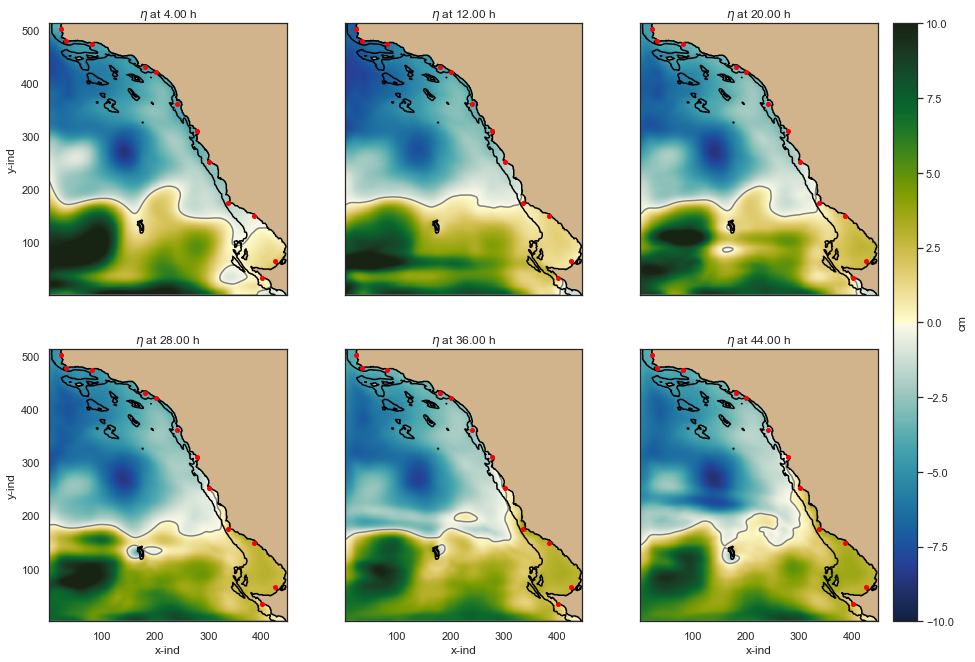

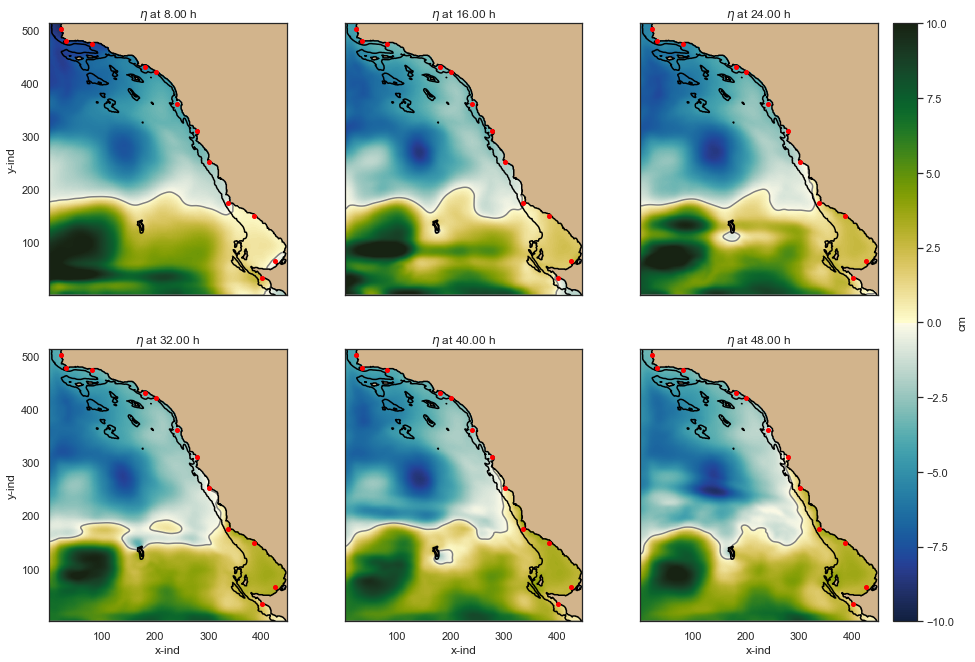

In [7]:
sns.set_context('notebook')
for nt in range(0,16):
    fig,ax0,ax1,ax2,ax3,ax4,ax5 = plot_ssh(nt, vmin=-10, vmax=10)